In [4]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.paths import project_dir
from src.datasets.ellipse_dataset import EllipseDataset
from src.preprocessing.main_create_v5_ellipsoid_dataset import interface_type_generator
from src.interface_representation.interface_types import InterfaceType

logging.basicConfig(level=logging.INFO)

In [9]:
base_dir = Path('../../../src/preprocessing')

In [10]:
interface_types = [
        InterfaceType.SIGNED_DISTANCE_EXACT,
        InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
        InterfaceType.HEAVISIDE,
        InterfaceType.TANH_EPSILON,
    ]

epsilons = [1/128, 1/64, 1/32, 1/16]

datasets = []

for interface_type, epsilon, outdir in interface_type_generator(interface_types, epsilons):
    datasets.append(EllipseDataset(base_dir / outdir, split='val', debug=True))

INFO:src.datasets.ellipse_dataset:Constructed splits of size (number of runs NOT snapshots): train=2000, val=500
INFO:src.datasets.ellipse_dataset:Loaded 3 files for split val
INFO:src.datasets.ellipse_dataset:First file: ../../src/preprocessing/data/v5_ellipsoids/SIGNED_DISTANCE_EXACT/spheres_305.npz
INFO:src.datasets.ellipse_dataset:Generated 3 samples of ellipse data
INFO:src.datasets.ellipse_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.ellipse_dataset:Constructed splits of size (number of runs NOT snapshots): train=2000, val=500
INFO:src.datasets.ellipse_dataset:Loaded 3 files for split val
INFO:src.datasets.ellipse_dataset:First file: ../../src/preprocessing/data/v5_ellipsoids/SIGNED_DISTANCE_APPROXIMATE/spheres_305.npz
INFO:src.datasets.ellipse_dataset:Generated 3 samples of ellipse data
INFO:src.datasets.ellipse_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.ellipse_dataset:Constructed splits of size (number of runs NOT

In [11]:
# First, check that all datasets have same length
lengths = [len(dataset) for dataset in datasets]
assert all(length == lengths[0] for length in lengths)

In [12]:

def visualise_dataset_sample(arr):
    arr = arr.squeeze()

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()


InterfaceType.SIGNED_DISTANCE_EXACT


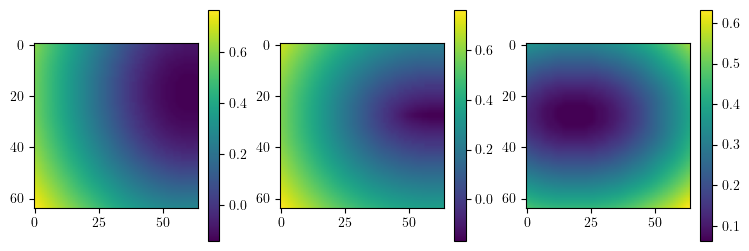

InterfaceType.SIGNED_DISTANCE_APPROXIMATE


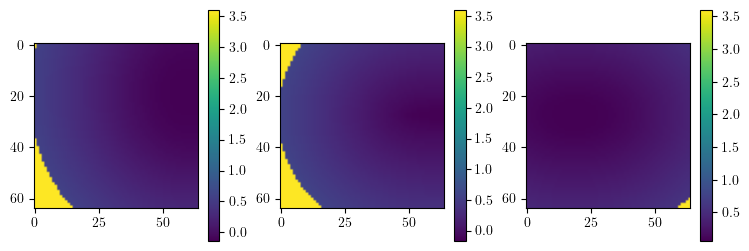

InterfaceType.HEAVISIDE


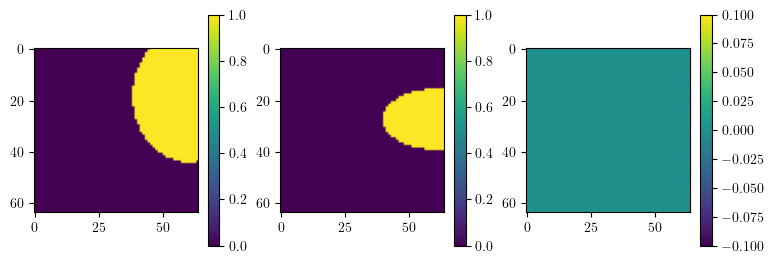

InterfaceType.TANH_EPSILON


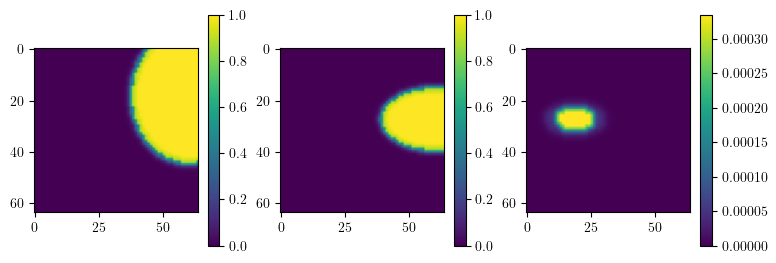

InterfaceType.TANH_EPSILON


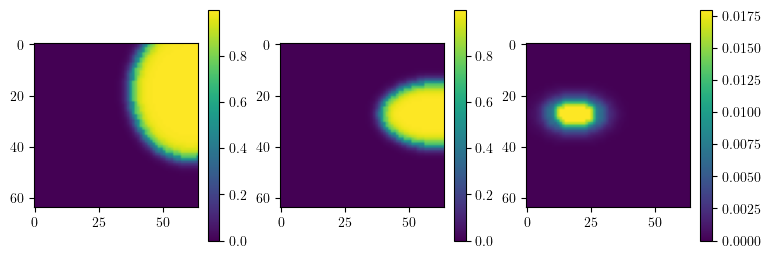

InterfaceType.TANH_EPSILON


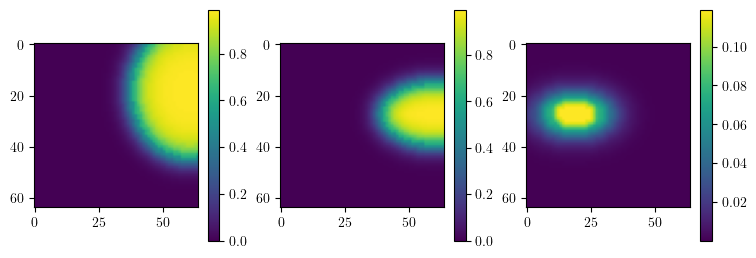

InterfaceType.TANH_EPSILON


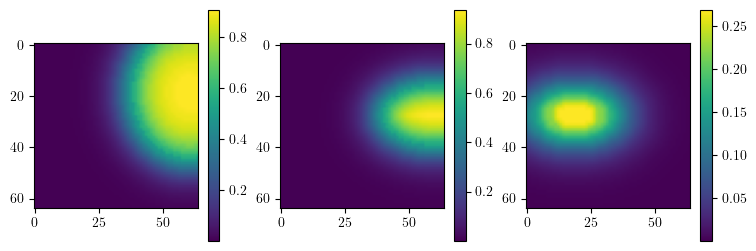

In [13]:
# Visualise first sample from each dataset

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    print(interface_type[0])
    visualise_dataset_sample(dataset[0])


In [14]:
def visualise_grad_magnitude(arr):
    dx = 1 / 64
    arr = arr.squeeze()
    grad = np.gradient(arr, dx)
    grad_magnitude = np.sqrt(np.sum(np.square(grad), axis=0))

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(grad_magnitude[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(grad_magnitude[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(grad_magnitude[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()
    

InterfaceType.SIGNED_DISTANCE_EXACT


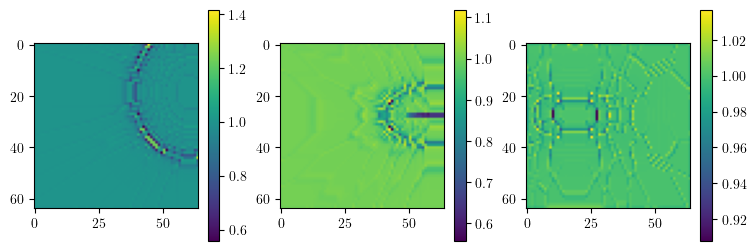

InterfaceType.SIGNED_DISTANCE_APPROXIMATE


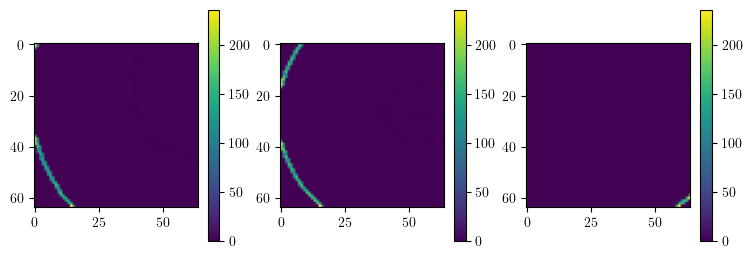

InterfaceType.HEAVISIDE


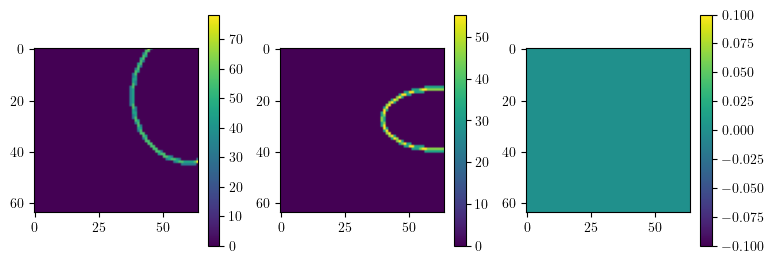

InterfaceType.TANH_EPSILON


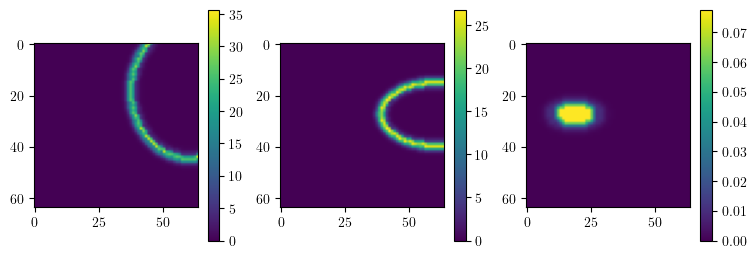

InterfaceType.TANH_EPSILON


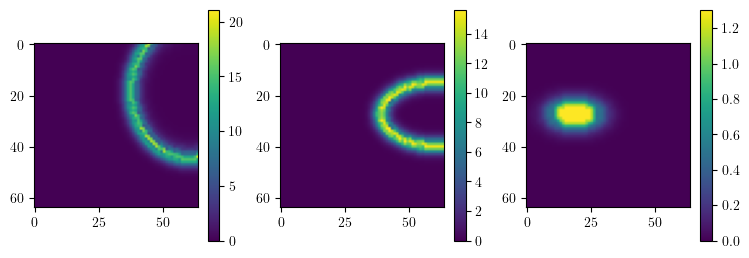

InterfaceType.TANH_EPSILON


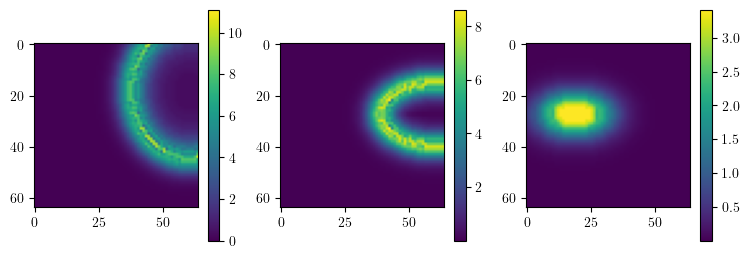

InterfaceType.TANH_EPSILON


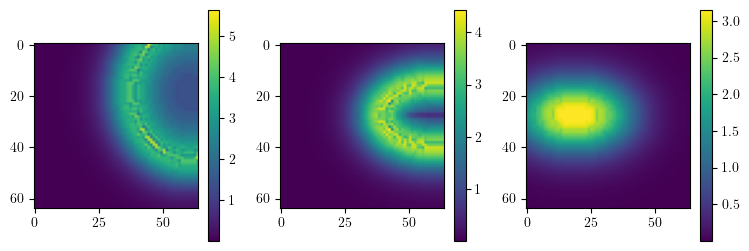

In [15]:
# Visualise gradient magnitude of first sample from each dataset

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    print(interface_type[0])
    visualise_grad_magnitude(dataset[0])
